**Step 1: Data Import & Cleaning**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("Walmart.csv")

In [12]:
# Display first 5 rows
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1    5/2/2010    1643690.90             0        42.31       2.572   
1      1   12/2/2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1    5/3/2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [5]:
# Check dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [6]:
# Check for missing values
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [7]:
# Basic statistics
print(df.describe())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.993007  1.046965e+06      0.069930    60.663782     3.358607   
std      80.979668  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max    6435.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


In [8]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

In [9]:
#  Drop NaT rows (Invalid Dates)
df = df.dropna(subset=['Date']).reset_index(drop=True)
print("Rows after dropping:", len(df))   # Expected ~2565

Rows after dropping: 2565


In [10]:
# Sort by Date
df = df.sort_values(by='Date').reset_index(drop=True)

In [4]:
# Again Check final dataset structure
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1    5/2/2010    1643690.90             0        42.31       2.572   
1      1   12/2/2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  

In [7]:
# Save to CSV as well 
df.to_csv("Walmart_Cleaned.csv", index=False)

print("✅ Cleaned dataset saved successfully!")

✅ Cleaned dataset saved successfully!


**Step 2: Aggregate to Monthly Sales**

In [8]:
# Convert 'Date' to month period (YYYY-MM)
df['Month'] = df['Date'].dt.to_period('M')

AttributeError: Can only use .dt accessor with datetimelike values

In [9]:
# Group by Month and sum weekly sales
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum().reset_index()


KeyError: 'Month'

In [15]:
# Convert 'Month' back to datetime for plotting
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

In [16]:
# Check result
print(monthly_sales.head(12))  # first 12 months

        Month  Weekly_Sales
0  2010-02-01  9.808742e+07
1  2010-03-01  9.279687e+07
2  2010-04-01  9.778912e+07
3  2010-05-01  4.850324e+07
4  2010-06-01  9.801509e+07
5  2010-07-01  9.681701e+07
6  2010-08-01  4.820500e+07
7  2010-09-01  9.282866e+07
8  2010-10-01  8.734285e+07
9  2010-11-01  9.190678e+07
10 2010-12-01  1.055758e+08
11 2011-01-01  4.277579e+07


**Step 3: Plot Sales Trend (Line Plot)**

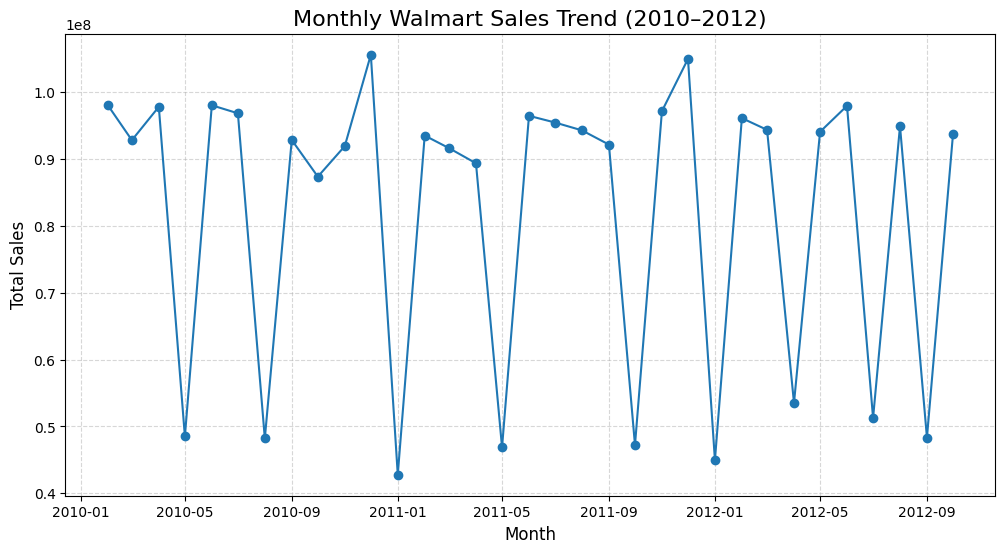

In [17]:
# Plot Monthly Sales Trend
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Month'], monthly_sales['Weekly_Sales'], marker='o', linestyle='-')

plt.title("Monthly Walmart Sales Trend (2010–2012)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Step 4: Moving Average (Trend Smoothing)**

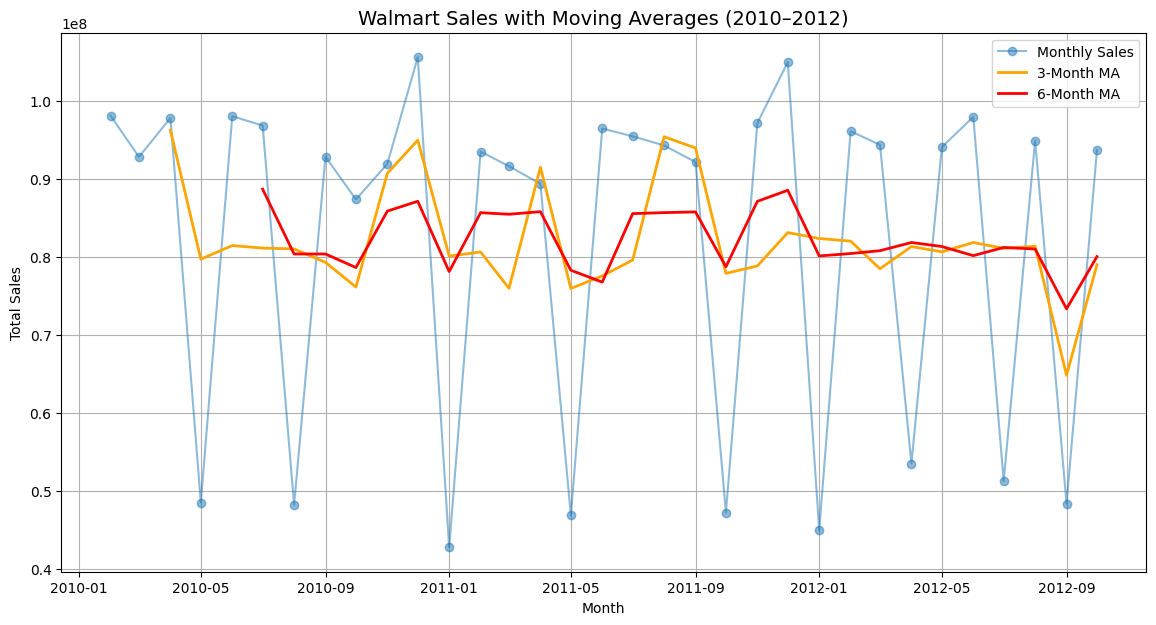

In [18]:

# 3-month moving average
monthly_sales['MA_3'] = monthly_sales['Weekly_Sales'].rolling(window=3).mean()

# 6-month moving average
monthly_sales['MA_6'] = monthly_sales['Weekly_Sales'].rolling(window=6).mean()

# Plot original + moving averages
plt.figure(figsize=(14,7))
plt.plot(monthly_sales['Month'], monthly_sales['Weekly_Sales'], 
         label='Monthly Sales', marker='o', alpha=0.5)
plt.plot(monthly_sales['Month'], monthly_sales['MA_3'], 
         label='3-Month MA', linewidth=2, color='orange')
plt.plot(monthly_sales['Month'], monthly_sales['MA_6'], 
         label='6-Month MA', linewidth=2, color='red')

plt.title("Walmart Sales with Moving Averages (2010–2012)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.show()


**Step 5: Seasonality Analysis**

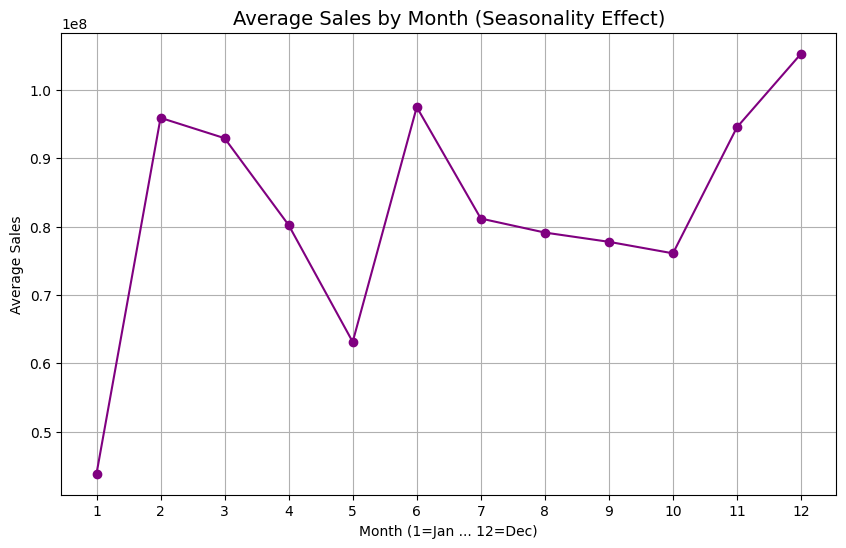

    Month_Num  Weekly_Sales
0           1  4.386560e+07
1           2  9.589058e+07
2           3  9.291543e+07
3           4  8.021263e+07
4           5  6.313843e+07
5           6  9.746321e+07
6           7  8.116927e+07
7           8  7.911980e+07
8           9  7.776619e+07
9          10  7.608323e+07
10         11  9.451828e+07
11         12  1.052638e+08


In [20]:

monthly_sales['Month_Num'] = monthly_sales['Month'].dt.month

# Group by month number (1=Jan, 12=Dec)
seasonality = monthly_sales.groupby('Month_Num')['Weekly_Sales'].mean().reset_index()

# Plot seasonality
plt.figure(figsize=(10,6))
plt.plot(seasonality['Month_Num'], seasonality['Weekly_Sales'], marker='o', color='purple')
plt.title("Average Sales by Month (Seasonality Effect)", fontsize=14)
plt.xlabel("Month (1=Jan ... 12=Dec)")
plt.ylabel("Average Sales")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

print(seasonality)


**Step 6: Break down revenue by Store (proxy for region)**

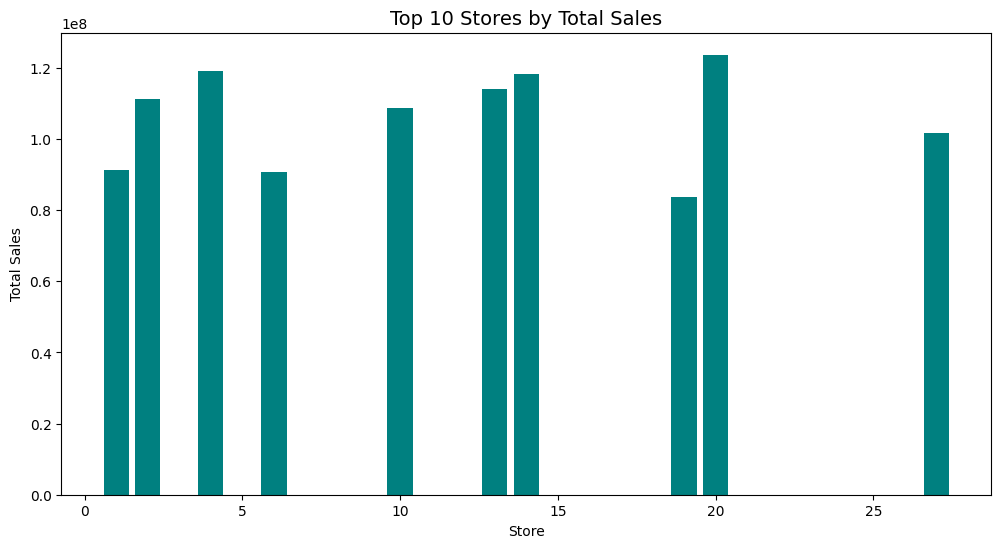

    Store  Weekly_Sales
19     20  1.236541e+08
3       4  1.190478e+08
13     14  1.182858e+08
12     13  1.138956e+08
1       2  1.112614e+08
9      10  1.085998e+08
26     27  1.016186e+08
0       1  9.130517e+07
5       6  9.056853e+07
18     19  8.371544e+07


In [21]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index().sort_values(by='Weekly_Sales', ascending=False)

# Plot top 10 stores
plt.figure(figsize=(12,6))
plt.bar(store_sales['Store'][:10], store_sales['Weekly_Sales'][:10], color='teal')
plt.title("Top 10 Stores by Total Sales", fontsize=14)
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()

print(store_sales.head(10))

C:\Users\M.ALI\AppData\Local\Temp\ipykernel_10248\2481256920.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales['Month'].iloc[-1], periods=13, freq='M')[1:], forecast, label="Forecast", color='red')


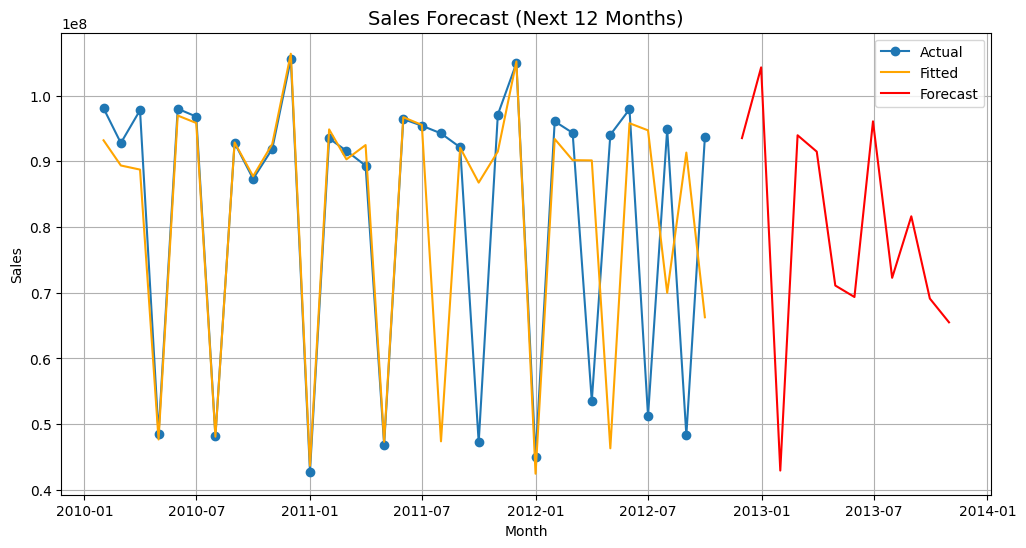

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit model (monthly_sales was already prepared earlier)
model = ExponentialSmoothing(monthly_sales['Weekly_Sales'], trend="add", seasonal="add", seasonal_periods=12)
fit = model.fit()

# Forecast next 12 months
forecast = fit.forecast(12)

# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Month'], monthly_sales['Weekly_Sales'], label="Actual", marker='o')
plt.plot(monthly_sales['Month'], fit.fittedvalues, label="Fitted", color='orange')
plt.plot(pd.date_range(monthly_sales['Month'].iloc[-1], periods=13, freq='M')[1:], forecast, label="Forecast", color='red')
plt.title("Sales Forecast (Next 12 Months)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()
